# Normalization Test
This notebook scales the amplitude

## Imports
This notebook uses the custom code found in the code folder

In [1]:
import os

# math, processing, deep learning
import numpy as np
import tensorflow as tf
from scipy.signal import stft, istft

# visualization
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits.axes_grid1 import make_axes_locatable


# custom code
from code.stftprocessing import StftDataset
from code.dsvisual import DatasetVisualizer

# convenience
from tqdm import tqdm
import datetime


2023-04-21 19:32:41.223817: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Load the files for training and testing
There are different training and test sets in the folder. This section loads the appropriate ones into memory.


In [2]:
# this is a smaller training set for testing purposes
folder = "training/new_small"
base = "noisy_small"
target = "pure_small"

# this is a training set for training the main model
# folder = "training/original training"
# base = "noisy"
# target = "pure"

test_folder = "training/test set"
test_base = "noisy_test"
test_target = "pure_test"


Load the files from the given locations using the custom code StftDataset class.

The StftDataset class also processes the waveforms into STFT format.

In [3]:
noisy_stft = StftDataset()
pure_stft = StftDataset()

noisy_stft.load(folder, base)
pure_stft.load(folder, target)

# test sets
noisy_test_stft = StftDataset()
pure_test_stft = StftDataset()
noisy_test_stft.load(test_folder, test_base)
pure_test_stft.load(test_folder, test_target)

Files loaded.
Files loaded.
Files loaded.
Files loaded.


In [15]:
# get the amplitudes of training and test sets
examples = noisy_stft.get_data()[:,:,:,:]
labels = pure_stft.get_data()[:,:,:,:]

In [16]:
t = noisy_stft.t
f = noisy_stft.f

In [17]:
examples.shape

(10000, 129, 9, 2)

In [18]:
test_example = examples[0]

In [24]:
test_example_complex = test_example[:,:,0]*np.exp(1j* test_example[:,:,1])

In [25]:
test_example_complex.shape

(129, 9)

In [27]:
t, wave = istft(test_example_complex, fs=5.)

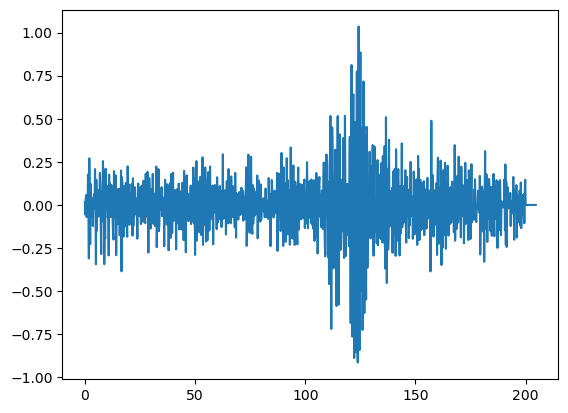

In [29]:
plt.plot(t, wave)

In [42]:
filtered_example = np.where(test_example[:,:,0] > 0.01,test_example[:,:,0], 0)

In [43]:
filtered_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

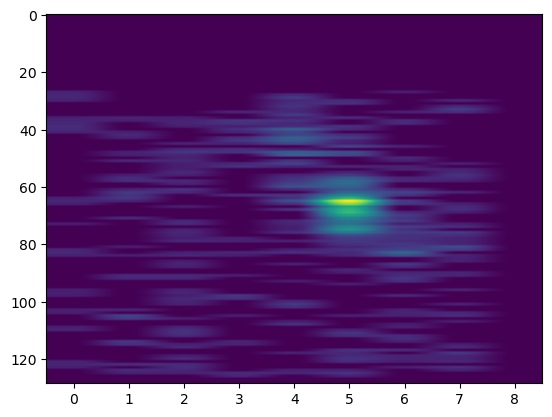

In [44]:
plt.imshow(filtered_example, aspect="auto")

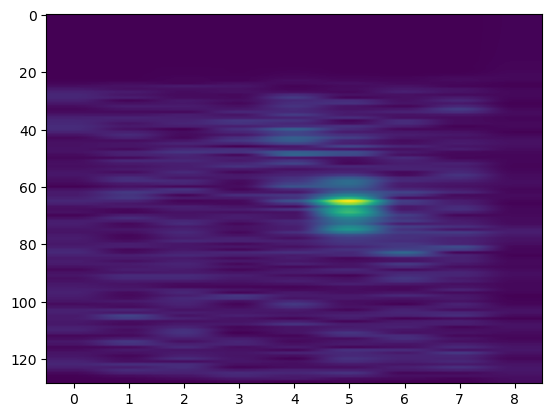

In [46]:
plt.imshow(test_example[:,:,0], aspect="auto")

In [31]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an

In [85]:
filtered_example = np.where(test_example[:,:,0] > 0.0175,test_example[:,:,0], 0)

In [86]:
test_example_complex_filtered = filtered_example[:,:]*np.exp(1j* test_example[:,:,1])

In [87]:
test_example_complex.shape

(129, 9)

In [88]:
t, new_wave = istft(test_example_complex_filtered, fs=5.)

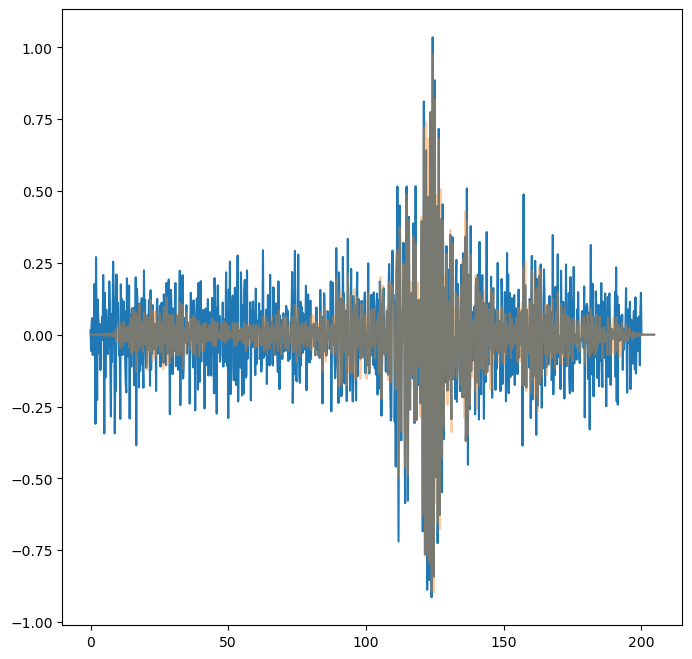

In [89]:
plt.figure(figsize=(8,8))
plt.plot(t, wave)
plt.plot(t, new_wave,alpha=0.4)


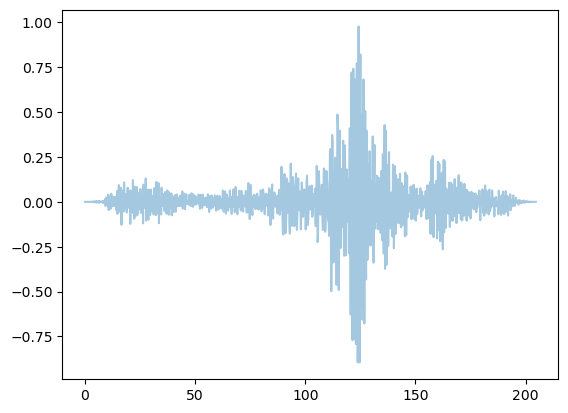

In [90]:
plt.plot(t, new_wave,alpha=0.4)
